<a href="https://colab.research.google.com/github/hieumtran/XTern2020/blob/main/XTern2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Import the data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = 'gdrive/My Drive/Colab Notebooks/XTern2020/'

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv(path+'2020-XTern-DS.csv')
df

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,$0.00,-,-,-,30 minutes
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118,91,30 minutes
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,$50.00,NEW,-,-,30 minutes
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",$10.00,$50.00,-,-,-,30 minutes


#2) Create dummy Count_Cuisine variable

In [5]:
# Create new dummy columns
key_cuisine = df['Cuisines'].tolist()
key = []
for k in key_cuisine:
  temp = k.split(', ')
  for j in temp:
    if j not in key:
      key.append(j)

for k in key:
  contain_key = []
  for i in range(len(df)):
    if k in df['Cuisines'][i]:
      contain_key.append(1)
    else:
      contain_key.append(0)
  df[k] = contain_key

count_cuisine = [df.iloc[i, 10:98].sum() for i in range(len(df))]
df['Count_Cuisine'] = count_cuisine

In [6]:
# Checking the variable
df

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Fast Food,Rolls,Burger,Salad,Wraps,Ice Cream,Desserts,Italian,Street Food,Mughlai,North Indian,Chinese,Cafe,Beverages,South Indian,Thai,Asian,Mithai,Momos,Indonesian,Biryani,Kerala,Bihari,Mexican,Japanese,Bakery,Burmese,Bubble Tea,Tea,Pizza,...,Parsi,Sushi,Odia,Tamil,Cantonese,North Eastern,Tibetan,Lebanese,Spanish,Bar Food,Konkan,Paan,Steak,Mediterranean,Bohri,Afghan,Goan,Gujarati,BBQ,Raw Meats,Malaysian,Vietnamese,Sri Lankan,Rajasthani,Poké,Roast Chicken,Coffee,Brazilian,Belgian,Naga,Korean,Modern Indian,Awadhi,Kashmiri,French,Portuguese,Charcoal Chicken,Frozen Yogurt,Bangladeshi,Count_Cuisine
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,$0.00,-,-,-,30 minutes,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118,91,30 minutes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,$50.00,NEW,-,-,30 minutes,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",$10.00,$50.00,-,-,-,30 minutes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


#3) Use the new Count_Cuisine variable and create a pivot table to analysis

- Firstly, I will temporarily remove the non-numeric value to use the pivot table

In [7]:
# Remove string data type from the data 
df = df[(df['Rating'] != 'NEW') & (df['Rating'] != '-') & (df['Rating'] != 'Opening Soon') & (df['Votes'] != '-') & (df['Reviews'] != '-')]
df = df.reset_index(drop=True)

# Transform the data to become numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df['Average_Cost'] = df['Average_Cost'].str.replace('$', '')
df['Minimum_Order'] = df['Minimum_Order'].str.replace('$', '')
df['Cook_Time'] = df['Cook_Time'].str.replace('minutes', '')
df['Average_Cost'] = pd.to_numeric(df['Average_Cost'], errors='coerce')
df['Minimum_Order'] = pd.to_numeric(df['Minimum_Order'], errors='coerce')
df['Cook_Time'] = pd.to_numeric(df['Cook_Time'], errors='coerce')


pivot_mean = pd.pivot_table(df, values=['Rating', 'Votes', 'Reviews'], index=['Count_Cuisine'], aggfunc={'Rating': np.mean, 'Votes': np.mean, 'Reviews': np.mean})
pivot_std = pd.pivot_table(df, values=['Rating', 'Votes', 'Reviews'], index=['Count_Cuisine'], aggfunc={'Rating': np.std, 'Votes': np.std, 'Reviews': np.std})
# df.to_csv(path+'TransformXtern.csv')
# df.groupby(['Count_Cuisine']).mean()

In [8]:
df

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Fast Food,Rolls,Burger,Salad,Wraps,Ice Cream,Desserts,Italian,Street Food,Mughlai,North Indian,Chinese,Cafe,Beverages,South Indian,Thai,Asian,Mithai,Momos,Indonesian,Biryani,Kerala,Bihari,Mexican,Japanese,Bakery,Burmese,Bubble Tea,Tea,Pizza,...,Parsi,Sushi,Odia,Tamil,Cantonese,North Eastern,Tibetan,Lebanese,Spanish,Bar Food,Konkan,Paan,Steak,Mediterranean,Bohri,Afghan,Goan,Gujarati,BBQ,Raw Meats,Malaysian,Vietnamese,Sri Lankan,Rajasthani,Poké,Roast Chicken,Coffee,Brazilian,Belgian,Naga,Korean,Modern Indian,Awadhi,Kashmiri,French,Portuguese,Charcoal Chicken,Frozen Yogurt,Bangladeshi,Count_Cuisine
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.0,50.0,3.5,12,4,30,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10.0,50.0,3.5,11,4,30,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.0,50.0,3.6,99,30,65,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.0,99.0,3.7,176,95,30,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20.0,99.0,3.2,521,235,65,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,ID_3928,39.353682,-85.071878,"North Indian, South Indian, Chinese, Fast Food",25.0,50.0,3.3,29,6,45,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1600,ID_3201,39.039147,-85.114505,"Beverages, Fast Food",15.0,50.0,3.7,22,16,30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1601,ID_5794,39.764745,-85.121567,Bengali,20.0,50.0,3.3,16,6,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1602,ID_319,39.133719,-85.503020,"Awadhi, Bihari",40.0,99.0,4.1,118,91,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2


In [9]:
pivot_mean

,Rating,Reviews,Votes
Count_Cuisine,,,
1,3.532915,43.143216,117.000000
2,3.568717,86.794376,187.240773
3,3.645070,143.349296,289.250704
4,3.770625,308.012500,552.081250
5,3.880000,251.600000,508.333333
6,3.992308,415.115385,761.076923
7,3.933333,541.666667,1023.555556
8,3.750000,253.416667,509.500000


In [10]:
pivot_std

,Rating,Reviews,Votes
Count_Cuisine,,,
1,0.394543,92.644289,238.112837
2,0.400447,235.218534,429.493077
3,0.410728,297.741919,556.060672
4,0.435182,681.374351,1014.888475
5,0.426488,316.141304,588.201573
6,0.363233,414.861261,797.159202
7,0.433013,920.533948,1623.965833
8,0.475777,453.235531,914.977546


## Visualize the data from pivot table

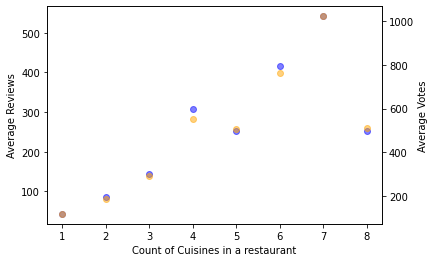

Correlation of votes and reviews:  0.9644514962195193


In [29]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(pivot_mean.index, pivot_mean['Reviews'], c='blue', alpha=0.5)
ax1.set_xlabel('Count of Cuisines in a restaurant')
ax1.set_ylabel('Average Reviews')
ax2.scatter(pivot_mean.index, pivot_mean['Votes'], c='orange', alpha=0.5)
ax2.set_ylabel('Average Votes')
plt.savefig(path+'Reviews and Cost.png')
plt.show()
print('Correlation of votes and reviews: ', df['Votes'].corr(df['Reviews']))

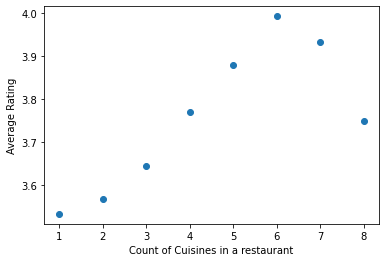

Correlation of rating and votes:  0.41917672206289197


In [30]:
plt.scatter(pivot_mean.index, pivot_mean['Rating'])
plt.xlabel('Count of Cuisines in a restaurant')
plt.ylabel('Average Rating')
plt.savefig(path+'Average Rating.png')
plt.show()
print('Correlation of rating and votes: ', df['Rating'].corr(df['Reviews']))

#4) Different dummy variables and pivot table

In [21]:
new_rating = df['Rating']*df['Votes']
df['Dummy Rating'] = new_rating

new_cost = df['Average_Cost'] - df['Minimum_Order']
df['Dummy Cost Gap'] = new_cost
pivot_nrating = pd.pivot_table(df, values=['Dummy Rating'], index=['Count_Cuisine'], aggfunc={'Dummy Rating': np.mean})
pivot_cost = pd.pivot_table(df, values=['Average_Cost', 'Minimum_Order', 'Cook_Time','Dummy Cost Gap'], index=['Count_Cuisine'], aggfunc={'Average_Cost': np.mean, 'Minimum_Order': np.mean, 'Cook_Time': np.mean, 'Dummy Cost Gap': np.mean})

In [22]:
pivot_cost

,Average_Cost,Cook_Time,Dummy Cost Gap,Minimum_Order
Count_Cuisine,,,,
1,15.012594,35.703518,-37.317380,52.324121
2,19.401408,37.653779,-33.950704,53.346221
3,24.309859,40.239437,-33.918310,58.228169
4,30.281250,41.156250,-22.931250,53.212500
5,31.266667,42.000000,-21.986667,53.253333
6,31.153846,40.192308,-22.615385,53.769231
7,28.333333,40.555556,-27.111111,55.444444
8,27.916667,38.750000,-26.166667,54.083333


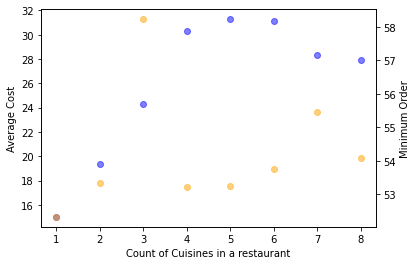

Correlation of Average_Cost and Minimum_Order:  0.20170821621198562


In [19]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(pivot_cost.index, pivot_cost['Average_Cost'], c='blue', alpha=0.5)
ax1.set_xlabel('Count of Cuisines in a restaurant')
ax1.set_ylabel('Average Cost')
ax2.scatter(pivot_cost.index, pivot_cost['Minimum_Order'], c='orange', alpha=0.5)
ax2.set_ylabel('Minimum Order')
plt.savefig(path+'AC and MO.png')
plt.show()
print('Correlation of Average_Cost and Minimum_Order: ', df['Average_Cost'].corr(df['Minimum_Order']))

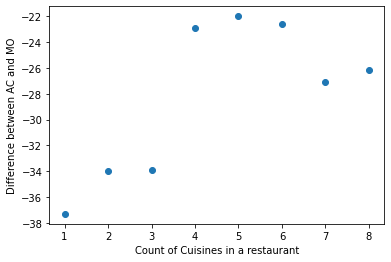

In [31]:
plt.scatter(pivot_cost.index, pivot_cost['Dummy Cost Gap'])
plt.xlabel('Count of Cuisines in a restaurant')
plt.ylabel('Difference between AC and MO')
plt.savefig(path+'Difference in AC and MO.png')
plt.show()

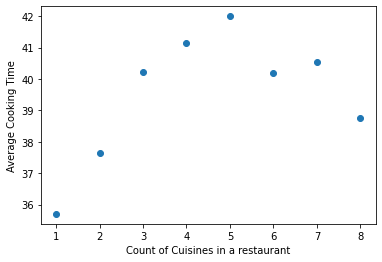

In [32]:
plt.scatter(pivot_cost.index, pivot_cost['Cook_Time'])
plt.xlabel('Count of Cuisines in a restaurant')
plt.ylabel('Average Cooking Time')
plt.savefig(path+'Average Cooking Time.png')
plt.show()

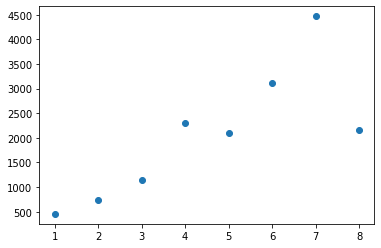

In [18]:
plt.scatter(pivot_nrating.index, pivot_nrating['Dummy Rating'])